# Исследование продаж автомобилей в Казахстане

## Описание данных

Датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из официальной статистики VAG, после перевода из эксель в csv обнаружились множественные проблемы с исходными данными: некорректные разделители десятичных разрядов, несоответствие данных типу данных. Дополнительной проблемой является то, что статистику собирал не один
человек, поэтому есть неявные дубликаты - например, 4WD, 4 WD и 4-WD, а также одни и те же признаки могут быть записаны как на русском, так и на английском языке. Также необходимо очистить датасет от лишних столбцов, которые используют технические специалисты, но которые не нужны в управленческом учете.

`Год` – год продажи (2019)

`Месяц` – месяц продажи (январь - сентябрь)

`Компания` – название автоцентра

`Бренд` – название продаваемой марки автомобиля

`Модель` – название модели автомобиля

`Год выпуска` – год производства автомобиля

`Страна-производитель` – страна, где произведен автомобиль

`Вид топлива` – бензин, дизель, электричество, гибрид

`Объём двиг л` – объем двигателя автомобиля в литрах

`Коробка передач` – тип коробки переключения передач (оставляем два варианта: автоматическая, механическая, то есть все что не механика ставим автомат, на DSG, S-Tronic и прочее делить не надо, равно как и количество передач)

`Тип привода` – в итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное (подключаемый полный привод и где нет четкого указания передний или задний это привод)

`Регион` – регион продажи

`Количество` – количество автомобилей в заказе

`Цена USD` – цена автомобиля

`Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)

`Область` – область продажи

`Сегментация 2013` – сегмент автомобиля актуальный

`Класс 2013` – класс автомобиля актуальный

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import squarify

### Загрузка файла

In [2]:
data = pd.read_csv('kz_2019_final_all_dirt.csv', decimal=',', index_col=0, low_memory=False)

In [3]:
print('Число строк:', len(data))
data.head()

Число строк: 32854


,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,безналичный,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,30581.0,30581.0,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,35087.719,35087.719,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,26608.232900297386,26608.232900297386,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,...,Юр. Лицо,безналичный,1.0,48343.98264845536,48343.98264845536,г.Алматы,Легковые автомобили,D класс,D,Импорт


### Переименование столбцов

Во-первых, удалим колонки, которые не участвуют в анализе

In [4]:
data = data.drop(['Модификация', 'Сегмент', 'Наименование дилерского центра', 'Тип клиента', 'Форма расчета', 
                  'Сегментация Eng', 'Локализация производства'], axis=1)

Во-вторых, приведем названия столбцов в удобный формат

In [5]:
data.columns = (data.columns.str.lower()
               .str.replace(',', '')
               .str.replace('-', '_')
               .str.replace(' ', '_')
               )
print(data.columns)

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'год_выпуска',
       'страна_производитель', 'вид_топлива', 'объём_двиг_л',
       'коробка_передач', 'тип_привода', 'регион', 'количество', 'цена_usd',
       'продажа_usd', 'область', 'сегментация_2013', 'класс_2013'],
      dtype='object')


### Анализ пропусков

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value = pd.DataFrame({'column_name': data.columns,
                              'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
год,год,0.000000
месяц,месяц,0.000000
компания,компания,0.000000
бренд,бренд,0.000000
модель,модель,0.000000
год_выпуска,год_выпуска,0.468740
страна_производитель,страна_производитель,0.000000
вид_топлива,вид_топлива,2.775918
объём_двиг_л,объём_двиг_л,5.740549
коробка_передач,коробка_передач,3.628173


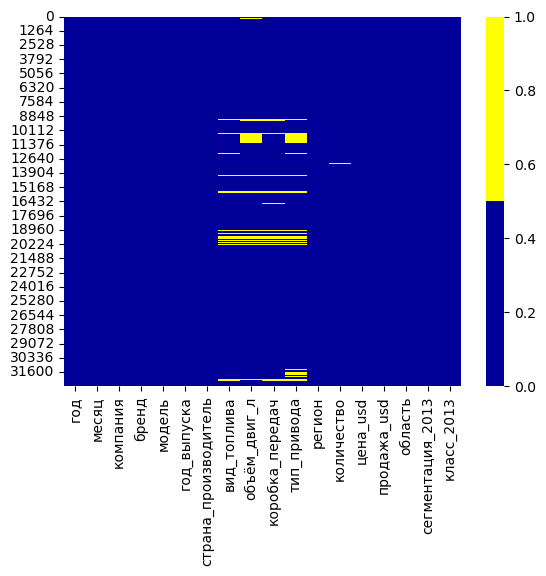

In [7]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colors = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isna(), cmap=sns.color_palette(colors))
plt.show()

Пропусков немного, но в сновном они присутствуют сразу в нескольких столбцах, потому их будет сложно заполнить.

In [8]:
rows_with_missing_values = data[data.isnull().any(axis=1)]
rows_with_missing_values.groupby('бренд')['бренд'].count().sort_values(ascending=False)

бренд
KAMAZ                  888
Renault                680
Volkswagen             342
Isuzu                  176
Land Rover             147
Mazda                  111
Mercedes-Benz           59
Jac                     42
Shacman                 36
Урал                    22
Lada                    20
UAZ                     18
Lexus                   17
Jaguar                  15
Scania                  13
Foton                   12
Infiniti                 8
Nissan                   7
Peugeot                  6
MAN                      5
ANKAI                    5
Kia                      3
Hyundai Truck & Bus      2
SsangYong                2
МАЗ                      2
Audi                     1
BMW                      1
Name: бренд, dtype: int64

Большое количество пропусков у брендов Камаз и Renault, изучим их подробнее

In [9]:
rows_with_missing_values[rows_with_missing_values['бренд'] == 'KAMAZ'].head(10)

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
10401,2019,Январь,ТК КАМАЗ,KAMAZ,4308,2013,Российская Федерация,Дизель,NaN,MT,NaN,Алматы,1.0,46411.13931240127,46411.13931240127,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики
10402,2019,Июль,ТК КАМАЗ,KAMAZ,43114,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Актау,1.0,32340.701856311567,32340.701856311567,Мангистауская область,Коммерческие автомобили,Крупнотоннажные грузовики
10403,2019,Июль,ТК КАМАЗ,KAMAZ,43114,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Усть-Каменогорск,1.0,32340.701856311567,32340.701856311567,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики
10404,2019,Июль,ТК КАМАЗ,KAMAZ,43114,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Костанай,1.0,32340.701856311567,32340.701856311567,Костанайская область,Коммерческие автомобили,Крупнотоннажные грузовики
10405,2019,Январь,ТК КАМАЗ,KAMAZ,43118,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Астана,1.0,64705.986759198444,64705.986759198444,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики
10406,2019,Январь,ТК КАМАЗ,KAMAZ,43118,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Актобе,1.0,64705.986759198444,64705.986759198444,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
10407,2019,Январь,ТК КАМАЗ,KAMAZ,43118,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Актобе,1.0,64705.986759198444,64705.986759198444,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
10408,2019,Январь,ТК КАМАЗ,KAMAZ,43118,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Атырау,1.0,64705.986759198444,64705.986759198444,Атырауская область,Коммерческие автомобили,Крупнотоннажные грузовики
10409,2019,Январь,ТК КАМАЗ,KAMAZ,43118,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Астана,1.0,64705.986759198444,64705.986759198444,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики
10410,2019,Январь,ТК КАМАЗ,KAMAZ,43118,2017,Республика Казахстан,Дизель,NaN,MT,NaN,Астана,1.0,64705.986759198444,64705.986759198444,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики


In [10]:
rows_with_missing_values[rows_with_missing_values['бренд'] == 'Renault'].tail(10)

,год,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
32366,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Уральск,1.0,14732.788631556505,14732.788631556505,Западно-Казахстанская область,Коммерческие автомобили,Развозные автомобили
32367,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Уральск,1.0,14732.788631556505,14732.788631556505,Западно-Казахстанская область,Коммерческие автомобили,Развозные автомобили
32368,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Шымкент,1.0,14732.788631556505,14732.788631556505,Южно-Казахстанская область,Коммерческие автомобили,Развозные автомобили
32369,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Алматы,1.0,14732.788631556505,14732.788631556505,г.Алматы,Коммерческие автомобили,Развозные автомобили
32370,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Шымкент,1.0,14732.788631556505,14732.788631556505,Южно-Казахстанская область,Коммерческие автомобили,Развозные автомобили
32371,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Алматы,1.0,14584.34038108645,14584.34038108645,г.Алматы,Коммерческие автомобили,Развозные автомобили
32372,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Алматы,1.0,14584.34038108645,14584.34038108645,г.Алматы,Коммерческие автомобили,Развозные автомобили
32373,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Астана,1.0,14732.788631556505,14732.788631556505,г.Астана,Коммерческие автомобили,Развозные автомобили
32374,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Костанай,1.0,14732.788631556505,14732.788631556505,Костанайская область,Коммерческие автомобили,Развозные автомобили
32375,2019,Август,Renault Россия,Renault,Dokker,2018,Российская Федерация,NaN,NaN,NaN,NaN,Астана,1.0,14732.788631556505,14732.788631556505,г.Астана,Коммерческие автомобили,Развозные автомобили


Есть много строк с пропусками сразу в нескольких столбцах. Можно было бы заполнить пропуски у Камаза, но он не будет иметь отношения к исследованию. Вот Renault заполнить не получится. При этом общее число строк с пропусками не такое большое, поэтому, чтобы до старости не вставлять значения по модели автомобиля, пропуски удалим.

In [11]:
# удалим пропуски
data = data.dropna()
len(data)

30214

### Дубликаты

In [12]:
data.duplicated().sum()

15600

Почти половина строк дубликаты, однако для рынка автомобилей это нормальное явление, комплектации могут быть схожи. По VIN номерам, которые в датасете отсутсвуют из соображений конфиденциальности, дубликаты не обнаружены.

### Кодировка стран
Перекодируем страны в столбце Страна производства в alpha3 (RUS, KAZ, USA и т.д.)

In [13]:
# посмотрим, какие страны присутствуют в столбце
data['страна_производитель'].unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Австрия', 'Нидерланды', 'Венгрия',
       'Швеция'], dtype=object)

In [14]:
# Используем метод pd.read_html для извлечения данных с кодировкой с сайта в ноутбук
type(pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8'))

list

In [15]:
# посмотрим первый элемент списка
type(pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0])

pandas.core.frame.DataFrame

Делаем датасет с кодами стран путем загрузки данных с сайта, одновременно
переименуем столбцы на английский язык для удобства работы

In [16]:
countries_codes = (pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0]
                   [['Наименование', 'Полное наименование', 'Alpha3']]
                  .rename(columns={'Наименование':'name', 'Полное наименование':'full_name'})
                  )

Создаем словарь для замены названий стран на коды Alpha3. Ключи - названия стран,
значения - коды.

In [17]:
countries_codes_dict = {}

for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
        
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

Производим замену по словарю методом get и lambda-функцией.
Данный способ вернет нам значение ячейки, даже если ее нет в ключах словаря

In [18]:
data['страна_производитель'] = data['страна_производитель'].apply(lambda cell: countries_codes_dict.get(cell, cell))
data['страна_производитель'].unique()

array(['DEU', 'США', 'KAZ', 'RUS', 'Белоруссия', 'TUR', 'JPN', 'Корея',
       'VNM', 'UK', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'],
      dtype=object)

Три страны не изменились, переименуем вручную

In [19]:
data['страна_производитель'] = (data['страна_производитель'].str.replace('США', 'USA')
                                .str.replace('Корея', 'KOR')
                                .str.replace('Белоруссия', 'BLR'))
data['страна_производитель'].unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'UK', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'], dtype=object)

Поменяем названия ключей стран, которые не прошли замену, с помощью метода pop

In [20]:
new_codes_dict = countries_codes_dict

new_codes_dict['Белоруссия'] = new_codes_dict.pop('Беларусь')
new_codes_dict['США'] = new_codes_dict.pop('Соединенные Штаты')
new_codes_dict['Корея'] = new_codes_dict.pop('Корея, Республика')

### Кодировка типа топлива

In [21]:
data['вид_топлива'].unique()

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', 'дизель ',
       'Газовый'], dtype=object)

In [22]:
# Преобразуем тип топлива в более удобный формат
data['вид_топлива'] = (data['вид_топлива'].str.replace('Бензин', 'F')
                       .str.replace('Дизель', 'D')
                       .str.replace('дизель ', 'D')
                       .str.replace('Электрический', 'E')
                       .str.replace('гибрид', 'HYB')
                       .str.replace('Газовый', 'G')
                      )
print(data['вид_топлива'].unique())

['F' 'D' 'HYB' 'E' 'G']


### Кодировка типа привода

In [23]:
data['тип_привода'].unique()

array(['FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD', 'Полный',
       'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ', 'задний', '2WD',
       '2 WD', '4 WD', '4х4', '4x2', 'FR', '4х2', '4x4', '2х4', 'CVT',
       '0', ' -', '-', 'P/TIME', 'FF', 'полный', '4Motion', 'передний '],
      dtype=object)

Разделим тип привода на 4 категории:
 - 4WD - полный привод;
 - FWD - передний привод;
 - RWD - задний привод;
 - 2WD - подключаемые приводы или те, которые не удалось определить

In [24]:
def drive_encoding(drive):
    if drive in ['quattro', 'Quattro', '4WD', 'Полный', 'AWD', '4 WD', '4х4', '4x4', 'полный', '4Motion']:
        return '4WD'
    elif drive in ['FWD', 'передний', 'Передний', 'FF', 'передний ']:
        return 'FWD'
    elif drive in ['RWD', 'Задний', 'задний']:
        return 'RWD'
    else:
        return '2WD'

data['тип_привода'] = data['тип_привода'].apply(drive_encoding) 
print(data['тип_привода'].unique())

['FWD' '4WD' 'RWD' '2WD']


### Столбец Дата

In [25]:
print(data['месяц'].unique())

['Май' 'Июнь' 'Июль' 'Январь' 'Февраль' 'Март' 'Апрель' 'Август'
 'Сентябрь']


In [26]:
# создадим словарь, чтобы первести месяцы в цифровой формат
month_dict = {'Январь': '01',
             'Февраль': '02',
             'Март': '03',
             'Апрель': '04',
             'Май': '05',
             'Июнь': '06',
             'Июль': '07',
             'Август': '08',
             'Сентябрь': '09'}
data['месяц'] = data['месяц'].map(month_dict)

In [27]:
# столбец "год" првератим в столбец "дата" путём объединения месяца и года, затем переведём его в формат даты
data['год'] = data['год'].astype('str') + '-' + data['месяц']
data = data.rename(columns = {'год': 'дата'})
data = data.drop('месяц', axis=1)
data['дата'] = pd.to_datetime(data['дата'], format='%Y-%m')

### Названия компаний

In [28]:
data['компания'].value_counts()

Toyota Motor Kazakhstan          10425
Astana Motors                     5744
БИПЭК АВТО                        3358
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1304
Nissan Manufacturing RUS          1022
Renault Россия                     633
Mercur Auto                        597
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
ММС Рус                            279
Автоцентр-Бавария                  197
Каспиан Моторс                     168
Autokapital                         97
MMC RUS                             33
Хино Моторс Казахстан               31
Hyundai Com Trans Kazakhstan        26
Eurasia Motor Premium               24
СВС                                 24
Scandinavian Motors                 22
ТК Рос-Авто                         15
Caspian Motors                      15
Daewoo Bus Kazakhstan               15
Sivi Finance Consulting              4
Scania Central Asia      

Есть 3 компании, которые написаны и на русском, и на английском языке

In [29]:
data['компания'] = (data['компания'].str.replace('MMC RUS', 'ММС Рус')
                    .str.replace('Caspian Motors', 'Каспиан Моторс')
                    .str.replace('Hino Motors Kazakhstan', 'Хино Моторс Казахстан'))

### Объем двигателя

In [30]:
data['объём_двиг_л'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '0', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '10.3', '8.7', '1600', '1.998', '1.598', '1.248', '2.359', '2359',
       '1999', '3.8', '3800', '1.591', '1.368', '3.342', '3.47', '3470',
       '2000', '1.999', '1.69', '1690', '1.774', '1598', '1774', '4.6',
       '3,5', '5.7', '10.5', '4', '12', '1.2', '3.6', '6.5', '5.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', '13', '16', '1400',
       '2.3', '1.33', '2,4G', '2.693', '2693', '2.235', '2235', '2.0',
       '14860', '14.8', '6.7', '1,2T', '4.88', '4.0'], dtype=object)

Объём двигателя запсан то в литрах, то в кубических сантиметров. Приведем все к одному формату и удалим буквенные обозначения.

In [31]:
# поменяем запятую на точку
data['объём_двиг_л'] = data['объём_двиг_л'].str.replace(',', '.')

# функция, которая удалит все символы, кроме точки и цифр
def cleaner_engine(volume):
    new_volume = re.sub(r'[^\d.]', '', volume)
    
    return new_volume

data['объём_двиг_л'] =  data['объём_двиг_л'].apply(cleaner_engine)

In [32]:
# поскольку есть значения, которые были записаны как кубические сантиметры, а также в тысячных долях, исправим это

data['объём_двиг_л'] = data['объём_двиг_л'].astype('float')

def super_cleaner_engine(volume):
    if volume > 1000:
        return volume / 1000
    elif volume < 0.1:
        return volume * 1000
    else:
        return volume
data['объём_двиг_л'] =  data['объём_двиг_л'].apply(super_cleaner_engine)

print(data[(data['объём_двиг_л'] != 0)].describe())

       объём_двиг_л
count  30213.000000
mean       2.265391
std        0.937653
min        1.200000
25%        1.600000
50%        2.000000
75%        2.693000
max       16.000000


### Регион

In [33]:
print(data['регион'].unique())

['Алматы' 'Костанай' 'Атырау' 'Астана' 'Уральск' 'Усть-Каменогорск'
 'Петропавловск' 'Павлодар' 'Кокшетау' 'Актау' 'Семей' 'Караганда'
 'Актобе' 'Шымкент' 'Талдыкорган' 'Кызылорда' 'Экибастуз' 'Рудный' 'Тараз'
 'Аксай' 'Щучинск' 'ЭКСПОРТ' 'Риддер']


In [34]:
# Сделаем, чтобы первая буква названия региона была заглавной.
data['регион'] = data['регион'].str.title()

### Год выпуска

In [35]:
data['год_выпуска'].unique()

array(['2018', '2017', '2016', '2011', '2015', '2014', '2013', '2\xa0018',
       '2\xa0017', '2\xa0016'], dtype=object)

In [36]:
# удалим спецсимволы
data['год_выпуска'] = data['год_выпуска'].str.replace('\xa0', '')

### Тип трансмиссии

In [37]:
data['коробка_передач'].unique()

array(['S-Тronic', 'S-Тroic', 'S-troic', 'S-tronic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ',
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', '9AT',
       'CVT (вариатор)', 'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT',
       '7AT', '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП',
       '8-ступ АКПП', 'АКПП8', '8', 'АКПП', ' -', '-', '7 DSG', '7DSG',
       '6 DSG', '6DSG', 'CVТ(вАриАтор)', '5MТ', 'АТ (автомат)',
       '8АТ4МoТion', '6A', '5M', '6-ступАКПП', '6А', 'AT (автомат)',
       '7DSG4МoТion', '6Aвтомат', '6Aатомат', '5М', '5-ступМТ', 'АT',
       'A/T', '7АT', 'МТ (механика)', 'Механическая'], dtype=object)

In [38]:
# Создадим 2 категории МКПП и АКПП
mechanical = ['5 МТ', '5MT', '5МТ', 'MT', 'МТ', 'MТ', '6MT', '6МТ', '6MТ',
           'Мех.', 'МКПП', '6 MT', '6 МТ', 'N', '6М/Т', '6M/T', '6M/Т', '5MТ',
           '5M', '5М', '5-ступМТ',  'МТ (механика)', 'Механическая', '0']


def transmission_clean(value):
    if value in mechanical:
        return 'МКПП'
    else:
        return 'АКПП'
    
data['коробка_передач'] = data['коробка_передач'].apply(transmission_clean)
data['коробка_передач'].unique()

array(['АКПП', 'МКПП'], dtype=object)

### Изменение типа данных

In [39]:
# столбцы с поавающей точкой
float_list = ['цена_usd', 'продажа_usd']
# столбцы с категориальными данными
category_list = ['вид_топлива', 'коробка_передач', 'тип_привода', 'сегментация_2013', 'класс_2013']

for column in data.columns:
    
    if column in float_list:
        data[column] = data[column].astype('float')
        
    elif column in category_list:
        data[column] = data[column].astype('category')

    else: 
        data[column] = data[column]
        
# столбец количество приведём к целому числу      
data['количество'] = pd.to_numeric(data['количество'], errors='coerce', downcast = 'integer')       

In [40]:
data.head()

,дата,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
1,2019-05-01,Mercur Auto,Audi,A3,2018,DEU,F,1.4,АКПП,FWD,Алматы,1,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс
2,2019-06-01,Mercur Auto,Audi,A3,2018,DEU,F,1.4,АКПП,FWD,Алматы,1,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс
3,2019-07-01,Mercur Auto,Audi,A3,2017,DEU,F,1.4,АКПП,FWD,Алматы,1,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс
4,2019-07-01,Mercur Auto,Audi,A4,2017,DEU,F,2.0,АКПП,4WD,Алматы,1,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс
5,2019-06-01,Mercur Auto,Audi,A5,2017,DEU,F,2.0,АКПП,4WD,Алматы,1,52760.736196,52760.736196,г.Алматы,Легковые автомобили,Спортивные автомобили


## Исследовательский анализ

### Топ-10 марок на рныке Казахстана в денежном и натуральном выражении

In [41]:
# создадим таблицу сгруппированную по маркам и посчитаем количество проданных автомобилей и сумму продаж
marks_top = (data.groupby('бренд')[['количество', 'продажа_usd']]
            .agg('sum')
            .reset_index()
           )

In [42]:
# сделаем, чтобы числа выводились с разделителями разрядов и не в научном формате
pd.options.display.float_format = '{:,.0f}'.format

In [43]:
# лидеры рейтинга будут отличаться по количеству и выручке, потому построим 2 графика и выведем таблицы
def top_10_chart(table, brand, amount, sales):
    
    plt.figure(figsize=(14, 5))

    ax1 = plt.subplot(1, 2, 1)
    
    amount_top = table.sort_values(by=amount, ascending=False).head(10)
    sns.barplot(data=amount_top, x=amount, y=brand)
    plt.title('Топ 10 марок в натуральном выражении')
    plt.xlabel('Количество проданных автомобилей')
    plt.ylabel('Бренд')

    ax2 = plt.subplot(1, 2, 2)

    sales_top = table.sort_values(by=sales, ascending=False).head(10)
    sns.barplot(data=table.sort_values(by=sales, ascending=False).head(10), x=sales, y=brand)
    plt.title('Топ 10 марок в денежном выражении')
    plt.xlabel('Объем продаж $')
    plt.ylabel('')
    
    display(amount_top, sales_top)
    
    plt.show()

,бренд,количество,продажа_usd
16,Lada,"9,638","93,870,615"
36,Toyota,"9,374","383,875,171"
9,Hyundai,"5,703","124,847,199"
7,GAZ,"2,111","40,420,595"
15,Kia,"1,815","36,750,900"
28,Ravon,"1,727","17,149,090"
25,Nissan,"1,648","36,988,183"
37,UAZ,"1,063","15,807,653"
18,Lexus,"1,051","83,284,987"
14,Jac,985,"13,683,222"


,бренд,количество,продажа_usd
36,Toyota,"9,374","383,875,171"
9,Hyundai,"5,703","124,847,199"
16,Lada,"9,638","93,870,615"
18,Lexus,"1,051","83,284,987"
7,GAZ,"2,111","40,420,595"
25,Nissan,"1,648","36,988,183"
15,Kia,"1,815","36,750,900"
2,BMW,373,"23,313,095"
34,Subaru,520,"17,311,553"
28,Ravon,"1,727","17,149,090"


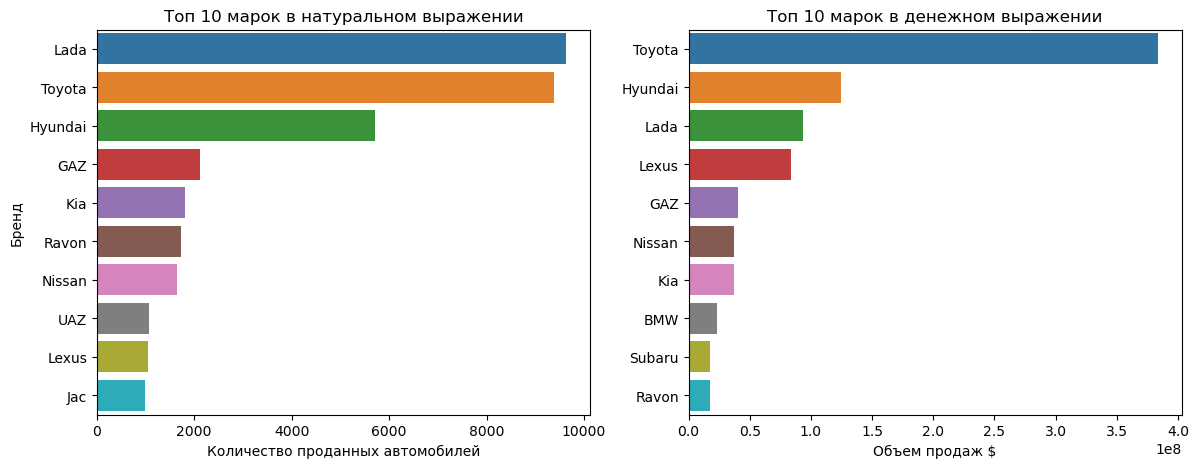

In [44]:
top_10_chart(marks_top, 'бренд', 'количество', 'продажа_usd')

Явно лидируют 3 производителя: Lada, Toyota и Hyundai. Однако из-за более низких цен на автомобили в денежном выражении Lada спускается на 3-ю строчку. В этом смысле сильно от рынка отрывается Toyota.

### Динамика продаж по рынку в целом

In [45]:
sales_dynamics = (data.groupby('дата')[['количество', 'продажа_usd']]
                .agg('sum')
                .reset_index()
               )
sales_dynamics

,дата,количество,продажа_usd
0,2019-01-01,"3,112","74,653,682"
1,2019-02-01,"3,898","93,747,224"
2,2019-03-01,"4,025","91,044,898"
3,2019-04-01,"4,324","104,699,289"
4,2019-05-01,"4,934","130,545,435"
5,2019-06-01,"5,284","140,623,114"
6,2019-07-01,"4,811","128,991,624"
7,2019-08-01,"5,216","132,327,292"
8,2019-09-01,"5,134","129,324,519"


In [46]:
def dynamics_chart(table, date, amount, sales):
    
    plt.figure(figsize=(14, 5))

    ax1 = plt.subplot(1, 2, 1)
    
    sns.lineplot(data=table, x=date, y=amount, marker='s')
    plt.title('Количество проданных машин по месяцам')
    plt.xlabel('Дата')
    plt.ylabel('Количество автомобилей')
    plt.xticks(rotation=45)
    plt.grid (True)


    ax2 = plt.subplot(1, 2, 2)
    
    sns.lineplot(data=table, x=date, y=sales, marker='s')
    plt.title('Динамика продаж по месяцам')
    plt.xlabel('Дата')
    plt.ylabel('Обем продаж $')
    plt.xticks(rotation=45)
    plt.grid (True)

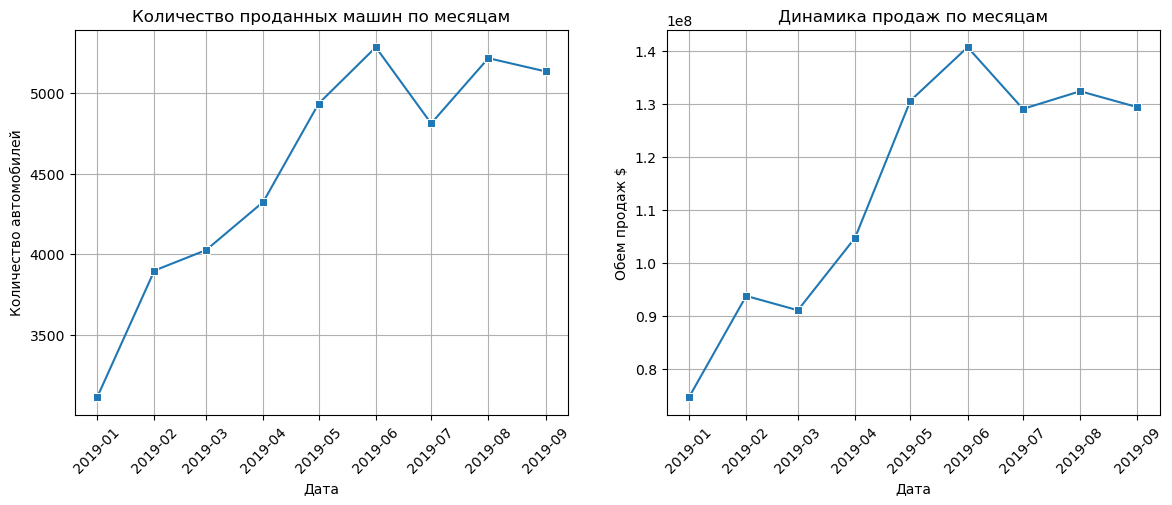

In [47]:
dynamics_chart(sales_dynamics, 'дата', 'количество', 'продажа_usd')

За 9 месяцев рынок значительно вырос (продажи в сетнябре на 73 процента выше, чем в январе), наибольший пик продаж пришел на май.

### Динамика продаж по категориям

#### Продажи по типу топлива

In [48]:
fuel_dynamics = pd.pivot_table(data, index='дата', columns='вид_топлива', values='продажа_usd', aggfunc='sum')
fuel_dynamics

вид_топлива,D,E,F,G,HYB
дата,,,,,
2019-01-01,"3,742,428",0,"70,846,054",0,"65,201"
2019-02-01,"4,141,040",0,"89,493,556",0,"112,628"
2019-03-01,"3,820,875",0,"87,224,023",0,0
2019-04-01,"4,551,554",0,"99,933,310",0,"214,426"
2019-05-01,"5,460,547",0,"125,019,883",0,"65,005"
2019-06-01,"3,577,495","47,132","136,317,856",0,"680,632"
2019-07-01,"6,165,185",0,"116,866,453","5,413,492","546,495"
2019-08-01,"7,434,481",0,"124,716,987",0,"175,824"
2019-09-01,"4,530,380",0,"124,580,138",0,"214,001"


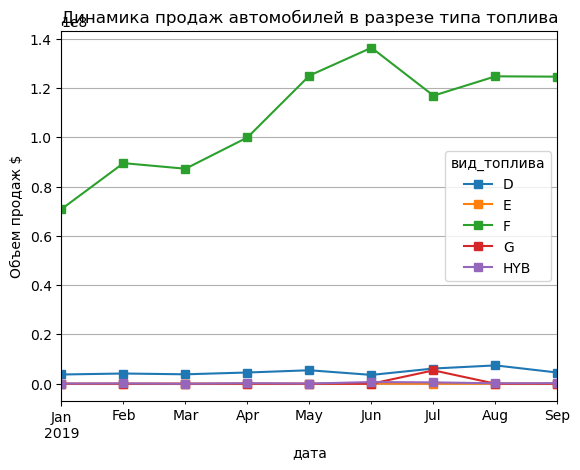

In [49]:
fuel_dynamics.plot(marker='s')
plt.title('Динамика продаж автомобилей в разрезе типа топлива')
plt.ylabel('Объем продаж $')
plt.grid (True)
plt.show()

In [50]:
ecar = data[data['вид_топлива'] == 'E']
ecar

,дата,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
174,2019-06-01,Автоцентр-Бавария,BMW,i3,2018,DEU,E,0,АКПП,RWD,Алматы,1,"47,132","47,132",г.Алматы,Легковые автомобили,B класс


In [51]:
gcar = data[data['вид_топлива'] == 'G']
gcar.head(3)

,дата,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
32730,2019-07-01,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,G,5,МКПП,2WD,Астана,1,"77,336","77,336",г.Астана,Коммерческие автомобили,Большие автобусы
32731,2019-07-01,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,G,5,МКПП,2WD,Астана,1,"77,336","77,336",г.Астана,Коммерческие автомобили,Большие автобусы
32732,2019-07-01,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,G,5,МКПП,2WD,Астана,1,"77,336","77,336",г.Астана,Коммерческие автомобили,Большие автобусы


Большой спрос на автомобили с бензиновым двигателем. Затем идут дизельные двигатели, а за ними гибридные. Лишь в июне была куплена одна электрическая BMW, а в июле была куплена партия автобусов с газовым двигателем. В остальном электрокары и автомобили на газу не продавались.

#### Продажи по сегментам

In [52]:
segment = pd.pivot_table(data, index='дата', columns='сегментация_2013', values='продажа_usd', aggfunc='sum')
segment

сегментация_2013,Внедорожники,Коммерческие автомобили,Легковые автомобили,Минивэны,Пикапы
дата,,,,,
2019-01-01,"41,612,413","6,324,459","23,745,316","443,631","2,527,864"
2019-02-01,"51,853,560","8,728,026","29,526,413","253,270","3,385,956"
2019-03-01,"47,075,943","9,276,203","32,100,150","42,376","2,550,225"
2019-04-01,"58,652,477","9,641,017","32,339,106","218,552","3,848,138"
2019-05-01,"66,788,976","10,839,674","49,343,873","725,689","2,847,223"
2019-06-01,"75,201,635","7,980,142","52,419,513","370,525","4,651,299"
2019-07-01,"67,302,997","16,327,932","42,447,038","142,263","2,771,394"
2019-08-01,"76,441,259","12,634,317","40,385,971","15,181","2,850,564"
2019-09-01,"78,677,980","9,386,423","39,452,953","113,694","1,693,469"


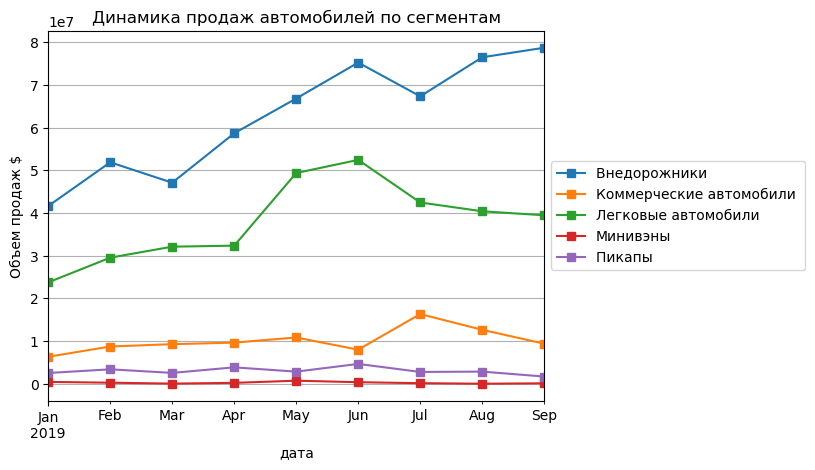

In [53]:
segment.plot(marker='s')
plt.title('Динамика продаж автомобилей по сегментам')
plt.ylabel('Объем продаж $')
plt.grid (True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Наибольший спрос на внедорожники, затем на легковые автомобили. Пикап и минивэны отстающие сегменты.

### Продажи по регионам

Определим 10 регионов с самым большим объемом продаж.

,регион,продажа_usd
3,Алматы,"328,245,798"
4,Астана,"226,826,446"
5,Атырау,"67,330,852"
19,Шымкент,"55,748,208"
8,Костанай,"54,281,570"
6,Караганда,"49,148,334"
18,Усть-Каменогорск,"36,079,957"
17,Уральск,"35,475,955"
1,Актау,"35,375,702"
2,Актобе,"32,946,576"


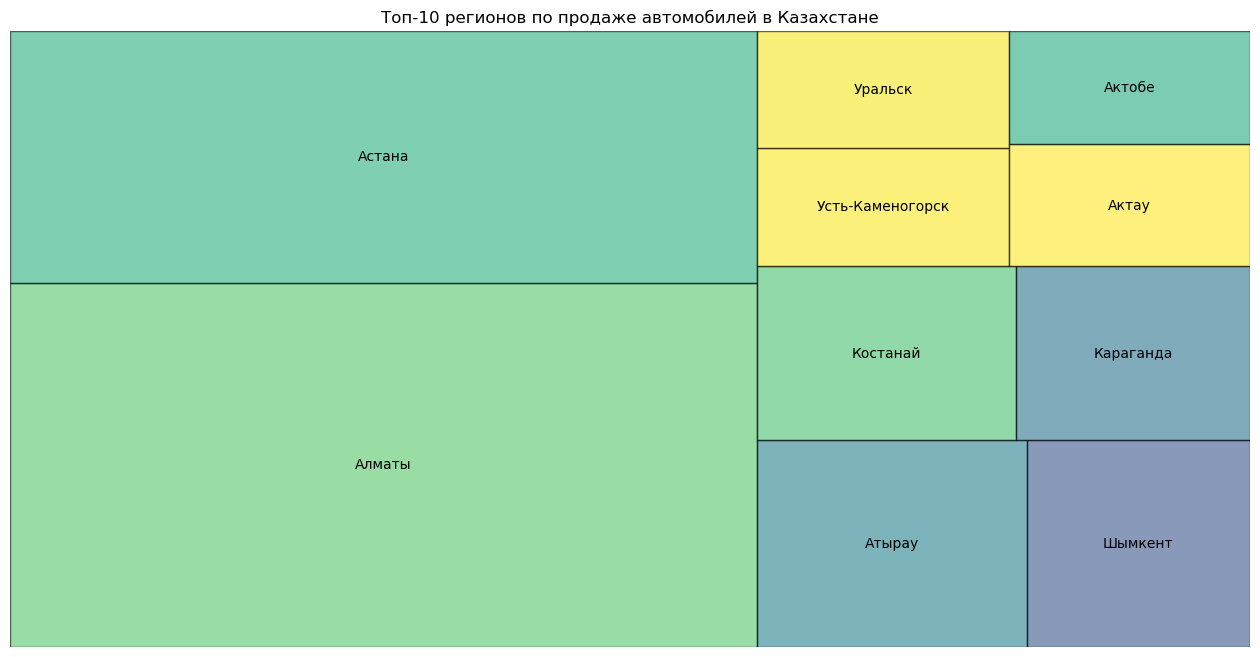

In [54]:
region_sales = (data.groupby('регион', as_index=False)['продажа_usd']
                .agg('sum')
                .sort_values(by='продажа_usd', ascending=False)
                .head(10))
display(region_sales)

plt.figure(figsize=(16, 8))
plt.title('Топ-10 регионов по продаже автомобилей в Казахстане')
squarify.plot(sizes=region_sales['продажа_usd'], label=region_sales['регион'], alpha=0.6, ec = 'black')
plt.axis('off')
plt.show()

Ожидаемо, что на 2 самых крупных города Казахстана приходится почти 2/3 продаж

### Продажи по дилерам

,компания,продажа_usd
15,Toyota Motor Kazakhstan,"467,160,158"
18,БИПЭК АВТО,"151,241,688"
1,Astana Motors,"128,815,365"
19,Вираж,"58,116,989"
8,Nissan Manufacturing RUS,"43,263,539"
0,Allur Auto,"28,064,063"
7,Mercur Auto,"24,323,357"
16,Автоцентр-Бавария,"24,235,302"
14,Subaru Kazakhstan,"17,311,553"
25,УзАвто-Казахстан,"17,149,090"


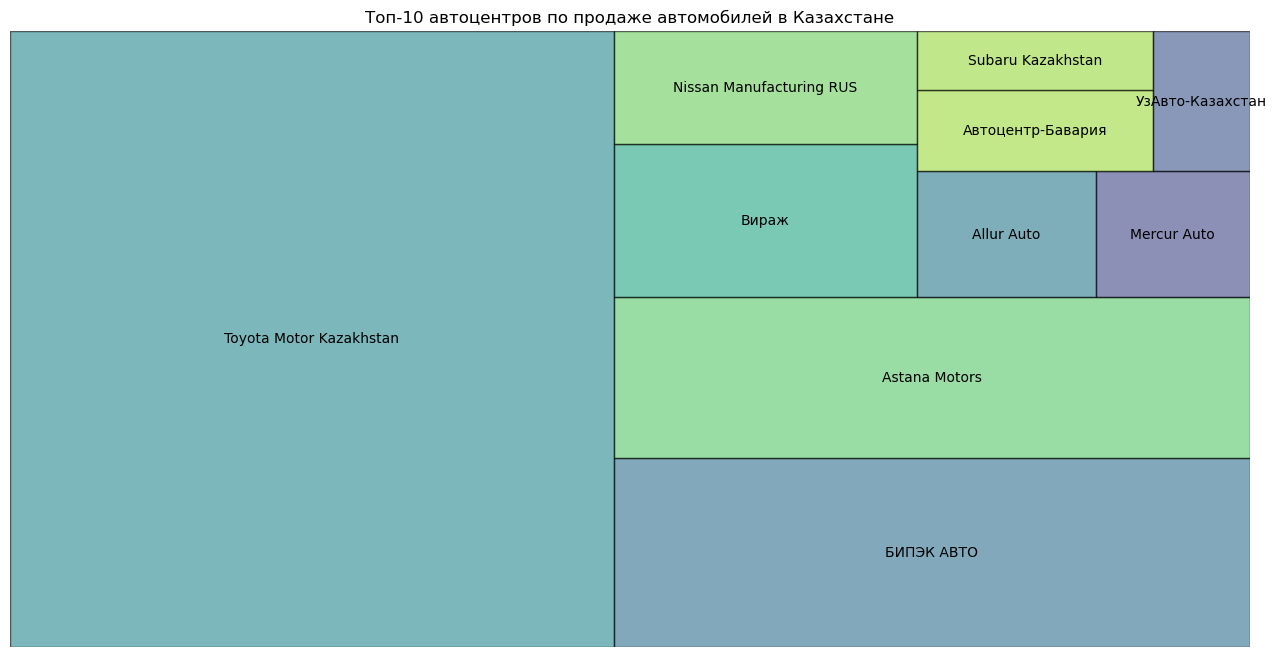

In [55]:
dealer_sales = (data.groupby('компания', as_index=False)['продажа_usd']
                .agg('sum')
                .sort_values(by='продажа_usd', ascending=False)
                .head(10))
display(dealer_sales)

plt.figure(figsize=(16, 8))
plt.title('Топ-10 автоцентров по продаже автомобилей в Казахстане')
squarify.plot(sizes=dealer_sales['продажа_usd'], label=dealer_sales['компания'], alpha=0.6, ec = 'black')
plt.axis('off')
plt.show()

3 дилера занимают почти 3/4 рынка. При этом одна Toyota занимает почти половину

### Промежуточный итог

3 наиболее популярных производителя на рынке Казахстана - Lada, Toyota и Hyundai. За 9 месяцев 2019 года рынок значительно вырос  (продажи в сетнябре на 73 процента выше, чем в январе). Наибольший объем продаж у автомобилей с бензиновым двигателем. И в основном покупают внедорожники и легковые автомобили.

Почти половина продаж приходится на 2 крупнейших города страны: Астана и Алматы. И большую часть рынка делят между собой 3 дилера: Toyota Motor Kazakhstan, БИПЭК АВТО и Astana Motors.

## Показатели эффективности Mercur Auto

### Выручка за весь период

In [56]:
mercur_auto = data[data['компания'] == 'Mercur Auto']

revenue = round(mercur_auto['продажа_usd'].sum(), 2)
print(f'Общая выручка за 9 месяцев {revenue}$')

revenue_by_brend = (mercur_auto.groupby('бренд', as_index=False)['продажа_usd'].agg('sum')
                   .sort_values(by='продажа_usd', ascending=False))

display(revenue_by_brend)

Общая выручка за 9 месяцев 24323357.23$


,бренд,продажа_usd
2,Volkswagen,"11,450,900"
1,Porsche,"6,547,384"
0,Audi,"6,325,073"


Выручка за 9 месяцев составила 24.3 млн $, большую часть которой принес Volkswagen

### Средняя стоимость продажи за весь преиод

In [57]:
avg_cost = round(mercur_auto['продажа_usd'].mean(), 2)
print(f'Средняя стоимость продажи {avg_cost}$')

avg_cost_by_brend = (mercur_auto.groupby('бренд', as_index=False)['продажа_usd'].agg('mean')
                   .sort_values(by='продажа_usd', ascending=False))
display(avg_cost_by_brend)

Средняя стоимость продажи 40742.64$


,бренд,продажа_usd
1,Porsche,"109,123"
0,Audi,"62,011"
2,Volkswagen,"26,324"


### Динамика выручки по месяцам

дата
2019-01-01   1,984,519
2019-02-01   1,643,827
2019-03-01   1,646,162
2019-04-01   3,625,124
2019-05-01   3,801,603
2019-06-01   3,937,747
2019-07-01   1,628,563
2019-08-01   2,441,936
2019-09-01   3,613,877
Name: продажа_usd, dtype: float64

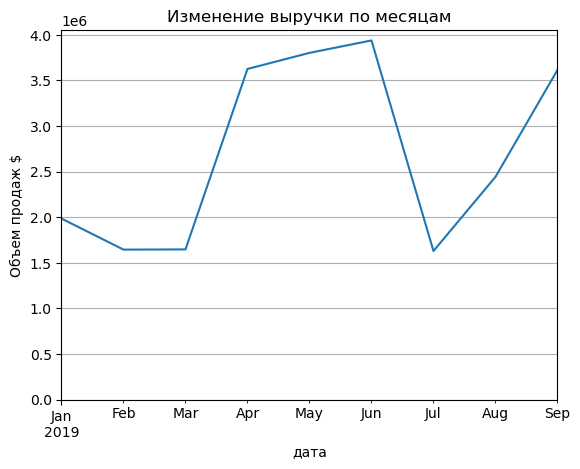

In [58]:
monthy_revenue = mercur_auto.groupby('дата')['продажа_usd'].agg('sum')
display(monthy_revenue)

monthy_revenue.plot()
plt.title('Изменение выручки по месяцам')
plt.ylabel('Объем продаж $')
plt.ylim(0)
plt.grid (True)
plt.show()

В целом видно по месяцам, что выручка росла, кроме июля.

### Средняя стоимость продажи по месяцам

дата
2019-01-01   38,164
2019-02-01   74,719
2019-03-01   35,786
2019-04-01   35,195
2019-05-01   42,715
2019-06-01   46,326
2019-07-01   81,428
2019-08-01   41,389
2019-09-01   29,867
Name: продажа_usd, dtype: float64

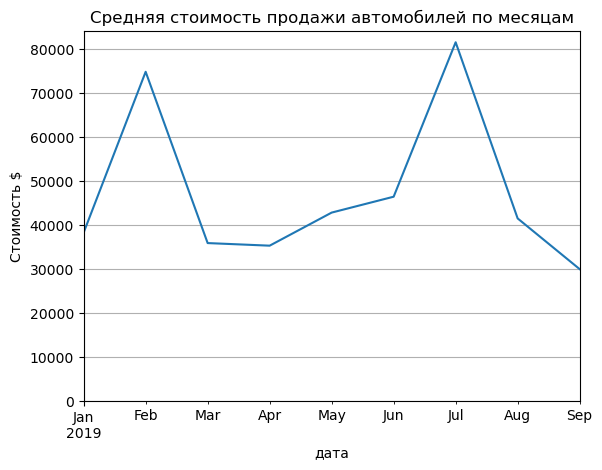

In [59]:
avg_monthy_cost = mercur_auto.groupby('дата')['продажа_usd'].agg('mean')
display(avg_monthy_cost)

avg_monthy_cost.plot()
plt.title('Средняя стоимость продажи автомобилей по месяцам')
plt.ylabel('Стоимость $')
plt.ylim(0)
plt.grid (True)
plt.show()

Заметны скачки средней стоимости продажи в феврале и июле, причем выручка в это время снижалась.

### Ежемесячная выручка по брендам

бренд,Audi,Porsche,Volkswagen
дата,,,
2019-01-01,"689,924","352,163","942,431"
2019-02-01,"858,706","785,121",NaN
2019-03-01,"570,077","293,341","782,744"
2019-04-01,"418,282","514,618","2,692,223"
2019-05-01,"320,652","983,217","2,497,734"
2019-06-01,"849,740","973,679","2,114,328"
2019-07-01,"445,641","1,162,298","20,625"
2019-08-01,"1,134,418","655,894","651,625"
2019-09-01,"1,037,633","827,053","1,749,191"


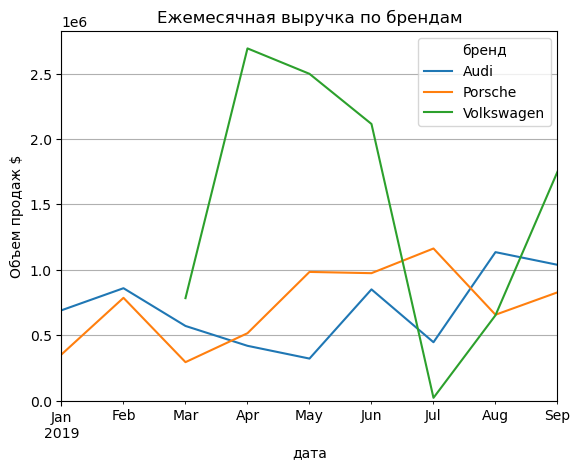

In [60]:
monthly_revenue_by_brend = pd.pivot_table(mercur_auto, index='дата', columns='бренд', values='продажа_usd', aggfunc='sum')
display(monthly_revenue_by_brend)

monthly_revenue_by_brend.plot()
plt.title('Ежемесячная выручка по брендам')
plt.ylabel('Объем продаж $')
plt.ylim(0)
plt.grid (True)
plt.show()

### Ежемесячная средняя стоимость продажи по брендам

бренд,Audi,Porsche,Volkswagen
дата,,,
2019-01-01,"45,995","117,388","27,719"
2019-02-01,"53,669","130,854",NaN
2019-03-01,"81,440","97,780","21,743"
2019-04-01,"59,755","128,655","29,263"
2019-05-01,"64,130","98,322","33,753"
2019-06-01,"70,812","97,368","33,561"
2019-07-01,"49,516","116,230","20,625"
2019-08-01,"75,628","93,699","17,611"
2019-09-01,"64,852","118,150","17,849"


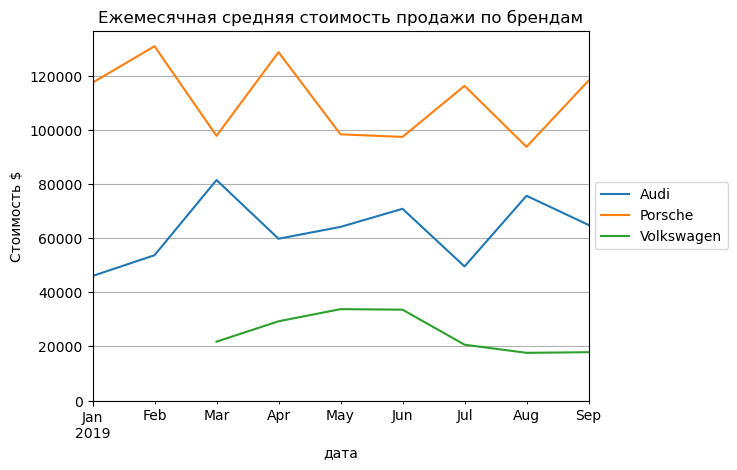

In [61]:
avg_monthly_revenue_by_brend = pd.pivot_table(mercur_auto, index='дата', columns='бренд', values='продажа_usd', aggfunc='mean')
display(avg_monthly_revenue_by_brend)

avg_monthly_revenue_by_brend.plot()
plt.title('Ежемесячная средняя стоимость продажи по брендам')
plt.ylabel('Стоимость $')
plt.ylim(0)
plt.grid (True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Заметно, что выручка росла, когда падал средний чек. Это произошло, потому что в это время, как видно из графиков, был всплеск продаж марки Volkswagen. Porsche и Audi продаются относительно равномерно по стабильным ценам.

### Ёмкость рынка

In [62]:
market_capacity = data['продажа_usd'].sum()
market_capacity

1025957078.0099266

In [63]:
market_capacity_units = data['количество'].sum()
market_capacity_units

40738

За наблюдаемый период на рынке всего было продано 40 738 автомобилей на сумму 1 млрд 25 млн $.

### Ёмкость рынка по сегментам

,сегментация_2013,количество,продажа_usd
0,Внедорожники,"17,048","563,607,241"
1,Легковые автомобили,"19,336","341,760,332"
2,Коммерческие автомобили,"3,483","91,138,193"
3,Пикапы,814,"27,126,131"
4,Минивэны,57,"2,325,181"


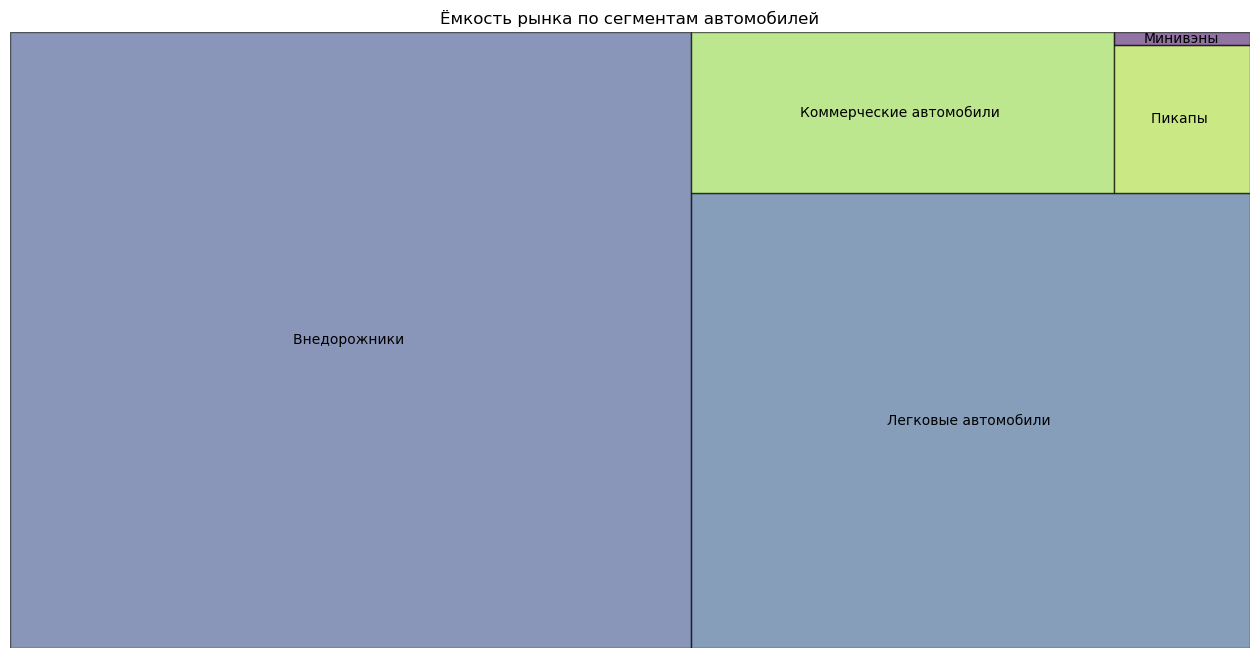

In [64]:
market_segment_capacity = (pd.pivot_table(data, index='сегментация_2013', values=['продажа_usd', 'количество'], aggfunc='sum')
                           .sort_values(by='продажа_usd', ascending=False).reset_index())
display(market_segment_capacity)

plt.figure(figsize=(16, 8))
plt.title('Ёмкость рынка по сегментам автомобилей')
squarify.plot(sizes=market_segment_capacity['продажа_usd'], label=market_segment_capacity['сегментация_2013'], alpha=0.6, ec = 'black')
plt.axis('off')
plt.show()

Общая ёмкость рынка 1.25 млрд $ из них почти 90% приходится на внедорожники и легковые автомобили

### Доля рынка

In [65]:
# посчитаем, какой процент продаж от общего объёма занимает Меркур Авто в денежном выражении
mercur_market_share = mercur_auto['продажа_usd'].sum() * 100 / market_capacity
mercur_market_share

2.3707967663960017

In [66]:
# посчитаем, какой процент продаж от общего объёма занимает Меркур Авто в количественном выражении
mercur_market_share_units = mercur_auto['количество'].sum() * 100 / market_capacity_units
mercur_market_share_units

1.7747557562963328

Меркур Авто на рынке имеет долю 2.4% от объёма продаж в $ и 1.8% от объёма продаж в количественном выражении

### Доля рынка по маркам автомобилей

In [67]:
mercur_market_brend_capacity = (data[(data['бренд'] == 'Volkswagen')|
                              (data['бренд'] == 'Audi')|
                             (data['бренд'] == 'Porsche')]
                        )

mercur_market_brend_capacity_table = (pd.pivot_table(mercur_market_brend_capacity, index='бренд', values=['продажа_usd', 'количество'], aggfunc='sum')
                           .sort_values(by='продажа_usd', ascending=False))
mercur_market_brend_capacity_table

,количество,продажа_usd
бренд,,
Volkswagen,558,"11,450,900"
Porsche,60,"6,547,384"
Audi,105,"6,325,073"


In [68]:
mercur_market_brend_capacity['компания'].unique()

array(['Mercur Auto'], dtype=object)

Меркур Авто единственный кто продаёт эти бренды

### Доля рынка в сегментах

In [69]:
# расчитаем, какую долю имеет меркур авто в каждом сегменте

# создадим таблицу по меркур авто, сгруппированную по сегментам
segments_mercur_auto = mercur_auto.groupby('сегментация_2013')[['количество', 'продажа_usd']].agg('sum')

# объединим таблицы по сегменту
market_segment_capacity = market_segment_capacity.merge(segments_mercur_auto, on=['сегментация_2013'])

# переименуем столбцы
market_segment_capacity = market_segment_capacity.rename(columns={'количество_x': 'Объем продаж, шт', 
                                                                  'продажа_usd_x': 'Объем продаж, $',
                                                                  'количество_y': 'Объем продаж Меркур, шт',
                                                                  'продажа_usd_y': 'Объем продаж Меркур $'})

market_segment_capacity['Доля Меркур, шт в %'] = market_segment_capacity['Объем продаж Меркур, шт'] * 100 / market_segment_capacity['Объем продаж, шт']
market_segment_capacity['Доля Меркур,$ в %'] = market_segment_capacity['Объем продаж Меркур $'] * 100 / market_segment_capacity['Объем продаж, $']

market_segment_capacity

,сегментация_2013,"Объем продаж, шт","Объем продаж, $","Объем продаж Меркур, шт",Объем продаж Меркур $,"Доля Меркур, шт в %","Доля Меркур,$ в %"
0,Внедорожники,"17,048","563,607,241",168,"9,655,007",1,2
1,Легковые автомобили,"19,336","341,760,332",545,"14,045,041",3,4
2,Коммерческие автомобили,"3,483","91,138,193",1,"34,694",0,0
3,Пикапы,814,"27,126,131",5,"282,968",1,1
4,Минивэны,57,"2,325,181",4,"305,646",7,13


В самых популярных категориях, внедорожники и легковые автомобили, Меркур Авто имеет доли 2 и 4 процента соответственно

### Конкуренты

Поскольку основная доля выручки приходит на легковые автомобили и внедорожники, нужно посмотреть с кем имеем дело в этих категориях.

In [70]:
competitors = data[(data['сегментация_2013'] == 'Легковые автомобили ')|(data['сегментация_2013'] == 'Внедорожники ')]
competitors_grouped = (competitors.groupby('компания', as_index=False)['продажа_usd']
                          .agg('sum')
                          .sort_values(by='продажа_usd', ascending=False)
                         )
competitors_grouped.head(10)

,компания,продажа_usd
12,Toyota Motor Kazakhstan,"440,696,691"
15,БИПЭК АВТО,"147,885,588"
1,Astana Motors,"124,487,655"
6,Nissan Manufacturing RUS,"43,263,539"
13,Автоцентр-Бавария,"24,235,302"
5,Mercur Auto,"23,700,049"
11,Subaru Kazakhstan,"17,311,553"
20,УзАвто-Казахстан,"17,149,090"
0,Allur Auto,"14,698,274"
19,ММС Рус,"13,121,762"


### Ближайшие конкуренты

Изучим также конкурентов, которые работают в тех же регионах, что и Меркур авто

In [71]:
mercur_auto['регион'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Караганда', 'Уральск'],
      dtype=object)

In [72]:
near_competitors = (competitors[(competitors['регион'] == 'Алматы')|
                                     (competitors['регион'] == 'Костанай')|
                                     (competitors['регион'] == 'Атырау')|
                                     (competitors['регион'] == 'Астана')|
                                     (competitors['регион'] == 'Караганда')|
                                     (competitors['регион'] == 'Уральск')])
(near_competitors.groupby('компания', as_index=False)['продажа_usd']
                          .agg('sum')
                          .sort_values(by='продажа_usd', ascending=False).head(10))

,компания,продажа_usd
12,Toyota Motor Kazakhstan,"337,167,294"
1,Astana Motors,"93,329,815"
15,БИПЭК АВТО,"82,918,699"
6,Nissan Manufacturing RUS,"36,825,745"
5,Mercur Auto,"23,700,049"
13,Автоцентр-Бавария,"21,524,722"
19,ММС Рус,"12,274,797"
11,Subaru Kazakhstan,"11,703,879"
0,Allur Auto,"10,103,952"
20,УзАвто-Казахстан,"9,626,336"


В сегменте внедорожников и легковых автомобилей Меркур Авто занимает 6 место по Казахстану и 5 место в регионах присутствия.

In [73]:
# изучим какие бренды продает Astana Motors
astana = near_competitors[near_competitors['компания'] == 'Astana Motors']
(astana.groupby('бренд', as_index=False)['продажа_usd']
                          .agg('sum')
                          .sort_values(by='продажа_usd', ascending=False).head(10))

,бренд,продажа_usd
0,Hyundai,"93,329,815"


In [74]:
# также изучим БИПЭК АВТО
bipek = near_competitors[near_competitors['компания'] == 'БИПЭК АВТО']
(bipek.groupby('бренд', as_index=False)['продажа_usd']
                          .agg('sum')
                          .sort_values(by='продажа_usd', ascending=False).head(10))

,бренд,продажа_usd
2,Lada,"46,564,715"
1,Kia,"25,421,400"
3,Skoda,"8,294,184"
0,Chevrolet,"2,005,400"
4,UAZ,"633,000"


### Рекомендации

- Самые продаваемые сегменты: внедорожники и легковые автомобили. Именно на них делает упор Меркур Авто. Однако за наблюдаемый период большой рост показали именно внедорожники, тогда как дилер продал почти в 2 раза больше легковых автомобилей, чем внедорожников. Возможно стоит сделать упор на моделях Volkswagen Tiguan и Touareg: и самый прибыльный бренд, и востребованный сегмент внедорожников. Аналогично с Audi и Porshe: нужно активнее продвигать модели Q у Audi и Macan вместе с Cayenne у Porsche.

- Также следует расширить географию присутствия в регионах из первой десятки по количеству продаж: Шымкент, Усть-Каменогорс Актау и Актобе.

- Возможно стоит расширить модельный ряд и добавить автомобили того же концерна VAG, например Skoda, как это делает БИПЭК АВТО